In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)

In [28]:
wall_series = pd.Series(range(3, 91, 3))
cpu_series = pd.Series([0.94,0.94,1.48,1.65,1.65,1.68,1.68,1.68,1.68,1.68,1.69,1.69,1.69,1.69,1.7,2.27,4.03,5.14,5.9,6.16,7.18,9.04,9.83,9.84,9.84,10.09,11.07,12.76,12.96,12.96])
memory_series = pd.Series([52355072,52355072,54808576,56049664,56049664,56270848,56270848,56270848,56270848,56270848,56270848,56270848,56270848,56270848,56270848,57372672,59535360,59535360,59535360,58884096,59953152,61304832,61304832,60272640,60272640,60272640,60272640,61079552,59830272,59830272])
bytes_read = pd.Series([7773917,8118878,8118878,8118878,8118878,8118878,8118878,8118878,8118878,8118878,8118878,8118878,8118878,8134997,8636757,8636757,8819029,8819030,9022806,9226582,9226582,9226582,9226582,9226582,9405782,9549142,9549142])
bytes_written = pd.Series([0,700416,700416,864256,864256,864256,864256,864256,864256,864256,864256,864256,864256,1519616,5414912,7434240,8478720,8785920,10956800,14548992,15187968,15187968,15278080,16130048,18640896,20664320,20725760])
bytes_received = pd.Series([2,9965,9965,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,17264,55329,76417,85718,89357,117798,148779,155956,155956,156864,168775,200763,216530,217206])
bytes_sent = pd.Series([2,116,116,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,22008,84156,100460,108335,112815,172402,202734,202923,202923,205374,228567,268790,272278,272297])

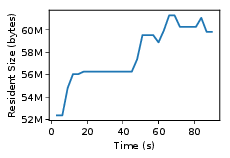

In [26]:
plt.figure(figsize=(3, 2))
ax = matplotlib.pyplot.gca()
mkfunc = lambda x, pos: '%1.0fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.0f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)
df = pd.DataFrame(dict(memory=memory_series, wall=wall_series))
sns.lineplot(data=df, y="memory", x="wall", ax=ax)
ax.set(xlabel="Time (s)", ylabel="Resident Size (bytes)")
plt.tight_layout(0)
plt.savefig("perf_rss.pgf")

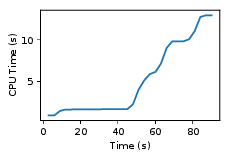

In [45]:
plt.figure(figsize=(3, 2))
ax = matplotlib.pyplot.gca()
mkfunc = lambda x, pos: '%1.0fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.0f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)
df = pd.DataFrame(dict(cpu=cpu_series, wall=wall_series))
sns.lineplot(data=df, y="cpu", x="wall", ax=ax)
ax.set(xlabel="Time (s)", ylabel="CPU Time (s)")
plt.tight_layout(0)
plt.savefig("perf_cpu.pgf")

In [39]:
df = pd.DataFrame()
df["Read"] = bytes_read
df["Written"] = bytes_written
df["Received"] = bytes_received
df["Sent"] = bytes_sent
df = df.set_index(pd.Series(range(3,82,3)))

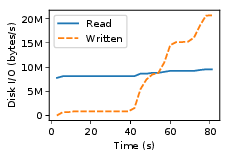

In [44]:
plt.figure(figsize=(3, 2))

ax = matplotlib.pyplot.gca()
mkfunc = lambda x, pos: '%1.0fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.0f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)
ax.set(xlabel="Time (s)", ylabel="Disk I/O (bytes/s)")

sns.lineplot(data=df[["Read", "Written"]], ax=ax)

plt.tight_layout(0)
plt.savefig("perf_io_rw.pgf")

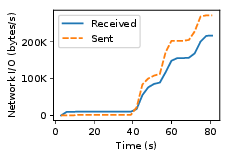

In [43]:
plt.figure(figsize=(3, 2))

ax = matplotlib.pyplot.gca()
mkfunc = lambda x, pos: '%1.0fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.0f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)
ax.set(xlabel="Time (s)", ylabel="Network I/O (bytes/s)")

fig = sns.lineplot(data=df[["Received", "Sent"]], ax=ax)

plt.tight_layout(0)
plt.savefig("perf_io_recvsent.pgf")